In [1]:
import os
print(os.listdir())

['.git', '.ipynb_checkpoints', 'Classification.ipynb', 'datatest.txt', 'datatest2.txt', 'datatraining.txt', 'Decision Tree.ipynb', 'groupStudy.csv', 'KNN.ipynb', 'LICENSE', 'Neural Network  MLPClassifier.ipynb', 'Social_Network_Ads.csv']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('datatraining.txt')
test1 = pd.read_csv('datatest.txt')
test2 = pd.read_csv('datatest2.txt')

In [4]:
dataset.head(20)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.180,27.272000,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.150,27.267500,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.150,27.245000,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.150,27.200000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.100,27.200000,426.0,704.500000,0.004757,1
6,2015-02-04 17:55:59,23.100,27.200000,419.0,701.000000,0.004757,1
7,2015-02-04 17:57:00,23.100,27.200000,419.0,701.666667,0.004757,1
8,2015-02-04 17:57:59,23.100,27.200000,419.0,699.000000,0.004757,1
9,2015-02-04 17:58:59,23.100,27.200000,419.0,689.333333,0.004757,1
10,2015-02-04 18:00:00,23.075,27.175000,419.0,688.000000,0.004745,1


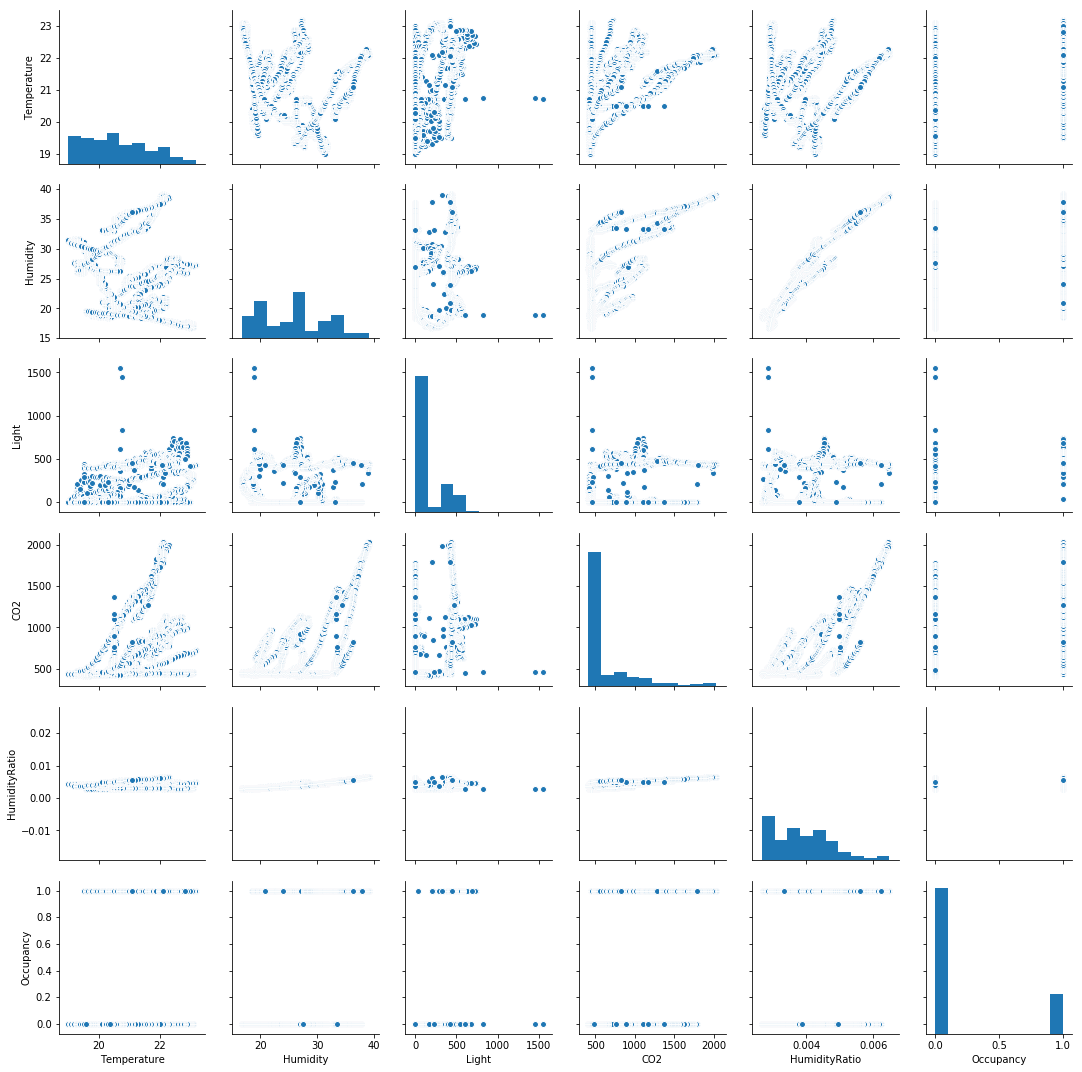

In [5]:
sns.pairplot(dataset)

In [6]:
X_train = dataset.iloc[:,1:6].values
y_train = dataset.iloc[:,6].values

X_test1 = test1.iloc[:,1:6].values
y_test1 = test1.iloc[:,6].values

X_test2 = test2.iloc[:,1:6].values
y_test2 = test2.iloc[:,6].values

In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [9]:
y_pred = mlp_classifier.predict(X_test1)

In [10]:
from sklearn.metrics import confusion_matrix,classification_report

In [11]:
print("Training Confusion Matrix\n", confusion_matrix(y_train,mlp_classifier.predict(X_train)))
print("Test1 Confusion Matrix\n", confusion_matrix(y_test1,mlp_classifier.predict(X_test1)))
print("Test2 Confusion Matrix\n", confusion_matrix(y_test2,mlp_classifier.predict(X_test2)))

Training Confusion Matrix
 [[6287  127]
 [   2 1727]]
Test1 Confusion Matrix
 [[1616   77]
 [   3  969]]
Test2 Confusion Matrix
 [[7367  336]
 [ 193 1856]]


In [12]:
print('CLASSIFICATION REPORT')
print("Training\n", classification_report(y_train,mlp_classifier.predict(X_train)))
print("Test1 \n", classification_report(y_test1,mlp_classifier.predict(X_test1)))
print("Test2 \n", classification_report(y_test2,mlp_classifier.predict(X_test2)))

CLASSIFICATION REPORT
Training
              precision    recall  f1-score   support

          0       1.00      0.98      0.99      6414
          1       0.93      1.00      0.96      1729

avg / total       0.99      0.98      0.98      8143

Test1 
              precision    recall  f1-score   support

          0       1.00      0.95      0.98      1693
          1       0.93      1.00      0.96       972

avg / total       0.97      0.97      0.97      2665

Test2 
              precision    recall  f1-score   support

          0       0.97      0.96      0.97      7703
          1       0.85      0.91      0.88      2049

avg / total       0.95      0.95      0.95      9752

